# Spaceship Titanic

**Competition Background**
In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

**Personal Goal**
Through this competition, I want to learn more about EDA and Data Visualization Skills. Especially after learning about `plotly` and `pivot_table`, I want to use them in my data visualization techniques. I also want to become more familiar with standard ML models to get a good prediction model.

## Step 0: Exploring the Dataset
Let's first look at our data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("../Data/spaceship-titanic/train.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Let's take a look at the null counts.

In [3]:
df_null =  pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
# print(df_null)

fig = make_subplots(rows=1, cols=1, column_titles = ["Train Data"] , x_title="Missing Values")

fig.add_trace(go.Bar(x=df_null[0], y=df_null.index, orientation="h",  
                     marker=dict(color=[n for n in range(12)], 
                                    line_color='rgb(0,0,0)' , 
                                    line_width = 2,
                                    coloraxis="coloraxis")
                     ),1, 1)

In [4]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Step 1: Data Cleaning and Data Wrangling
We can see that there is a lot of missing data based on the amount of `null` values. We will focus on cleaning it throughout `Step 2: EDA and Data Visualization`  and `Step 3: Machine Learning`, since first, I think it is better to first get an understanding of our dataset.

## Step 2: EDA and Data Visualization
Let's visualize our data set to get a better understanding.

<AxesSubplot:title={'center':'Destination'}, ylabel='None'>

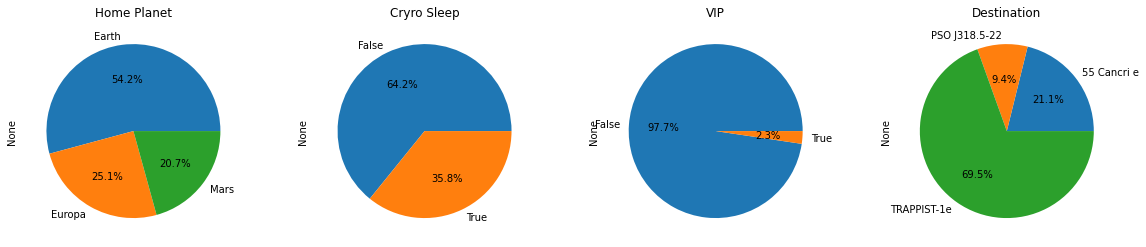

In [5]:
# Lets use the pie chart to visiualize categorical data 

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
fig.set_facecolor("white")

home_planet = df.groupby(by="HomePlanet").size()
home_planet.plot(kind='pie', ax=axes[0], title="Home Planet", autopct="%1.1f%%")

cryo_sleep = df.groupby(by="CryoSleep").size()
cryo_sleep.plot(kind='pie', ax=axes[1], title="Cryro Sleep", autopct="%1.1f%%")

vip = df.groupby(by="VIP").size()
vip.plot(kind="pie", ax=axes[2], title="VIP", autopct="%1.1f%%")

destination = df.groupby(by="Destination").size()
destination.plot(kind="pie", ax=axes[3], title="Destination", autopct="%1.1f%%")

We see that cabin also has some categorical data, but it contains a couple elements. The cabin number records "where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard". So, lets split this into three seperate columns first.

In [6]:
cabin_number = df["Cabin"]
cabin_number = cabin_number.str.split("/", expand=True)

# Create New Columns
new_columns =  ["Cabin_Deck", "Cabin_Num", "Cabin_Side"]
num_split_columns = cabin_number.shape[1]
new_column_names = [i for i in new_columns]
cabin_number.columns = new_column_names

# 
df["Cabin_Deck"] = cabin_number["Cabin_Deck"]
df["Cabin_Num"] = cabin_number["Cabin_Num"]
df["Cabin_Side"] = cabin_number["Cabin_Side"]

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Deck,Cabin_Num,Cabin_Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


<AxesSubplot:title={'center':'Cabin Side'}, ylabel='None'>

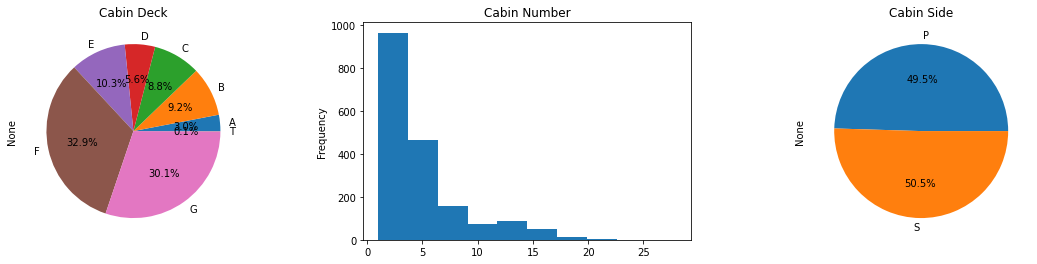

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))

cabin_deck = df.groupby("Cabin_Deck").size()
cabin_deck.plot(kind="pie", ax=axes[0], title = "Cabin Deck", autopct="%1.1f%%")

cabin_deck = df.groupby("Cabin_Num").size()
cabin_deck.plot(kind="hist", ax=axes[1], title = "Cabin Number")

cabin_deck = df.groupby("Cabin_Side").size()
cabin_deck.plot(kind="pie", ax=axes[2], title = "Cabin Side", autopct="%1.1f%%")

Let's look at some age related statistics.

Text(0.5, 0, 'Age')

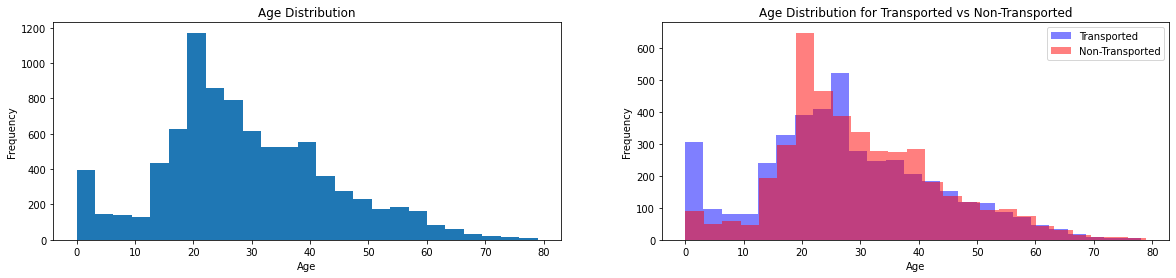

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))

age = df["Age"]
ax1 = age.plot(kind="hist", bins=25, ax=axes[0], title="Age Distribution")
ax1.set_xlabel("Age")

transported = df[(df["Transported"] == True)]
non_transported = df[(df["Transported"] == False)]

ax2 = transported.plot(kind="hist", y="Age", ax=axes[1], color='blue', alpha=0.5, bins=25, label='Transported')
ax2 =non_transported.plot(kind="hist", y="Age", ax=axes[1], color='red', alpha=0.5, bins=25, label='Non-Transported')
ax2.set_title('Age Distribution for Transported vs Non-Transported')
ax2.set_xlabel("Age")

Now, lets focus on how these categories might correlate to being transported or not.

Text(0.5, 1.0, 'Home Planet vs Transported Heatmap')

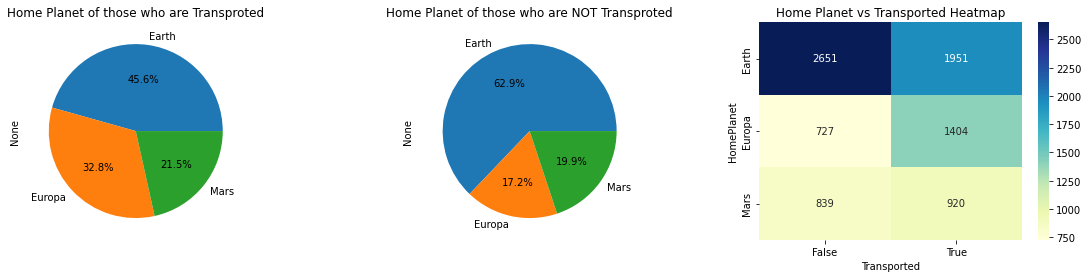

<Figure size 576x432 with 0 Axes>

In [9]:
transported = df[(df["Transported"] == True)]
non_transported = df[(df["Transported"] == False)]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

# Home Planet vs Transported
home_planet_transported = transported.groupby("HomePlanet").size()
home_planet_transported.plot(kind='pie', ax=axes[0], title="Home Planet of those who are Transproted", autopct="%1.1f%%")

home_planet_not_transported = non_transported.groupby("HomePlanet").size()
home_planet_not_transported.plot(kind='pie', ax=axes[1], title="Home Planet of those who are NOT Transproted", autopct="%1.1f%%")

# Creating a pivot table to prepare data for the heatmap
pivot_table = df.pivot_table(index='HomePlanet', columns='Transported', aggfunc='size')

# Creating the heatmap
plt.figure(figsize=(8, 6))
ax3 = sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True, ax=axes[2])
ax3.set_title('Home Planet vs Transported Heatmap')

Text(0.5, 1.0, 'Cryo Sleep vs Transported Heatmap')

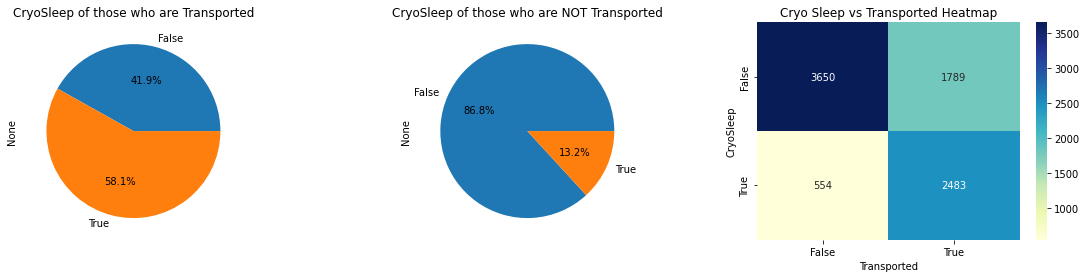

<Figure size 576x432 with 0 Axes>

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

# Home Planet vs Transported
cryo_sleep_transported = transported.groupby("CryoSleep").size()
cryo_sleep_transported.plot(kind='pie', ax=axes[0], title="CryoSleep of those who are Transported", autopct="%1.1f%%")

cryo_sleep_not_transported = non_transported.groupby("CryoSleep").size()
cryo_sleep_not_transported.plot(kind='pie', ax=axes[1], title="CryoSleep of those who are NOT Transported", autopct="%1.1f%%")

# Creating a pivot table to prepare data for the heatmap
pivot_table = df.pivot_table(index='CryoSleep', columns='Transported', aggfunc='size')

# Creating the heatmap
plt.figure(figsize=(8, 6))
ax3 = sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True, ax=axes[2])
ax3.set_title('Cryo Sleep vs Transported Heatmap')

Text(0.5, 1.0, 'Cryo Sleep vs Transported Heatmap')

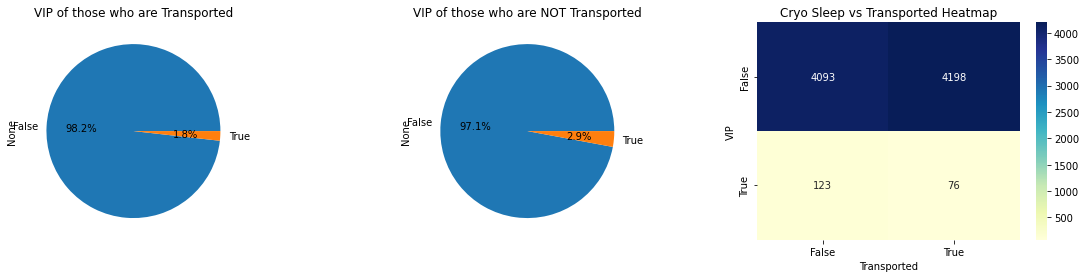

<Figure size 576x432 with 0 Axes>

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

# Home Planet vs Transported
VIP_transported = transported.groupby("VIP").size()
ax1 = VIP_transported.plot(kind='pie', ax=axes[0], title="VIP of those who are Transported", autopct="%1.1f%%")


VIP_not_transported = non_transported.groupby("VIP").size()
VIP_not_transported.plot(kind='pie', ax=axes[1], title="VIP of those who are NOT Transported", autopct="%1.1f%%")

# Creating a pivot table to prepare data for the heatmap
pivot_table = df.pivot_table(index='VIP', columns='Transported', aggfunc='size')

# Creating the heatmap
plt.figure(figsize=(8, 6))
ax3 = sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True, ax=axes[2])
ax3.set_title('Cryo Sleep vs Transported Heatmap')

Text(0.5, 1.0, 'Destination vs Transported Heatmap')

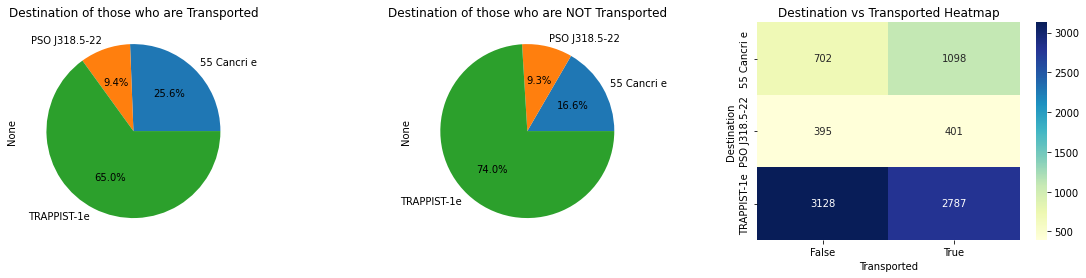

<Figure size 576x432 with 0 Axes>

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

# Home Planet vs Transported
destination_transported = transported.groupby("Destination").size()
destination_transported.plot(kind='pie', ax=axes[0], title="Destination of those who are Transported", autopct="%1.1f%%")


destination_not_transported = non_transported.groupby("Destination").size()
destination_not_transported.plot(kind='pie', ax=axes[1], title="Destination of those who are NOT Transported", autopct="%1.1f%%")

# Creating a pivot table to prepare data for the heatmap
pivot_table = df.pivot_table(index='Destination', columns='Transported', aggfunc='size')

# Creating the heatmap
plt.figure(figsize=(8, 6))
ax3 = sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True, ax=axes[2])
ax3.set_title('Destination vs Transported Heatmap')

Wow, pivot tables are quite helpful. I think I will be using them more often to make multivariable comparisons.

<AxesSubplot:xlabel='VIP'>

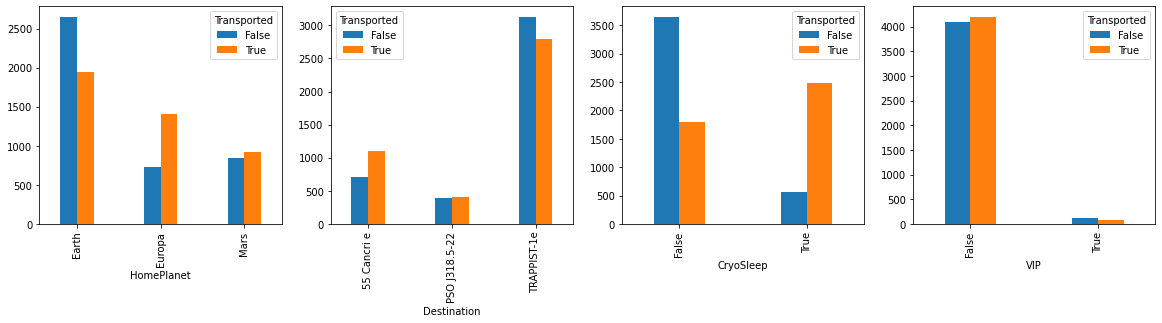

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
home_planet_pivot_table = df.pivot_table(index='HomePlanet', columns="Transported" , aggfunc='size')
destination_planet_pivot_table = df.pivot_table(index='Destination', columns="Transported", aggfunc='size')
cryo_sleep_pivot_table = df.pivot_table(index='CryoSleep', columns="Transported", aggfunc='size')
VIP_pivot_table = df.pivot_table(index='VIP', columns="Transported", aggfunc='size')

# Creating the double bar graph
home_planet_pivot_table.plot(kind='bar', width=0.4, ax=axes[0])
destination_planet_pivot_table.plot(kind='bar', width=0.4, ax=axes[1])
cryo_sleep_pivot_table.plot(kind='bar', width=0.4, ax=axes[2])
VIP_pivot_table.plot(kind='bar', width=0.4, ax=axes[3])

# Step 3: Machine Learning
The first part of this section focuses on preparing our train and test data sets for Machine Learning. Then we perform some simple Machine Learning algorithms.

In [14]:
train_df = pd.read_csv("../Data/spaceship-titanic/train.csv")
test_df = pd.read_csv("../Data/spaceship-titanic/test.csv")
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [15]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Let's look at null counts for test as well.

In [16]:
print(test_df.isnull().sum().sort_values(ascending=False))

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64


In [17]:
# Split the Cabin Column
def split_cabin(df):
    cabin_number = df["Cabin"]
    cabin_number = cabin_number.str.split("/", expand=True)

    # Create New Columns
    new_columns =  ["Cabin_Deck", "Cabin_Num", "Cabin_Side"]
    # num_split_columns = cabin_number.shape[1]
    new_column_names = [i for i in new_columns]
    cabin_number.columns = new_column_names

    # 
    df["Cabin_Deck"] = cabin_number["Cabin_Deck"]
    df["Cabin_Num"] = cabin_number["Cabin_Num"]
    df["Cabin_Side"] = cabin_number["Cabin_Side"]
    
split_cabin(df=train_df)
split_cabin(df=test_df)

# Then let's drop it
train_df.drop("Cabin", axis=1, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)

test_df.tail(10)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_Deck,Cabin_Num,Cabin_Side
4267,9260_01,Earth,True,55 Cancri e,3.0,NaN,0.0,0.0,0.0,0.0,0.0,Luisy Portananney,G,1503,P
4268,9262_01,Earth,False,55 Cancri e,20.0,False,0.0,601.0,103.0,35.0,0.0,Sonald Hurchrisong,F,1795,S
4269,9263_01,Earth,True,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Loisey Heney,G,1495,S
4270,9265_01,Mars,False,TRAPPIST-1e,43.0,False,47.0,0.0,3851.0,0.0,0.0,Toate Cure,D,278,S
4271,9266_01,Earth,False,TRAPPIST-1e,40.0,False,0.0,865.0,0.0,3.0,0.0,Danna Peter,F,1796,S
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN
4274,9271_01,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P
4275,9273_01,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P
4276,9277_01,Earth,True,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,G,1498,S


In [18]:
# Let's fill out some NaN. And drop some columns.
data = [train_df, test_df]
test_passenger_id = test_df["PassengerId"]
for dataset in data:
    dataset.drop(["PassengerId", "Name"], axis=1, inplace=True)

# Fill HomePlanet with most common
for dataset in data:
    most_common_category = dataset['HomePlanet'].mode()[0]
    dataset['HomePlanet'] = dataset['HomePlanet'].fillna(most_common_category)
    
# Fill out CryoSleep with most common
for dataset in data:
    most_common_category = dataset['CryoSleep'].mode()[0]
    dataset['CryoSleep'] = dataset['CryoSleep'].fillna(most_common_category)

# Fill out Age
for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
    
# Sort by Age Group
qcut = pd.qcut(train_df['Age'], 5)
age_categories = qcut.unique()

for dataset in data:
    for i, category in enumerate(age_categories):
        mask = qcut == category
        dataset.loc[mask, 'Age'] = i

# Fill out Destination with most popular
for dataset in data:
    most_common_category = dataset['Destination'].mode()[0]
    dataset['Destination'] = dataset['Destination'].fillna(most_common_category)

# Fill out VIP with most popular
for dataset in data:
    most_common_category = dataset['VIP'].mode()[0]
    dataset['VIP'] = dataset['VIP'].fillna(most_common_category)

# Fill Cabin_Deck, Cabin_Num, Cabin_Side
for dataset in data:
    cabin_deck_mode = dataset['Cabin_Deck'].mode()[0]
    cabin_num_mode = dataset['Cabin_Num'].mode()[0]
    cabin_side_mode =  dataset['Cabin_Side'].mode()[0]
    dataset['Cabin_Deck'] = dataset['Cabin_Deck'].fillna(cabin_deck_mode)
    dataset['Cabin_Num'] = dataset['Cabin_Num'].fillna(cabin_num_mode)
    dataset['Cabin_Side'] = dataset['Cabin_Side'].fillna(cabin_side_mode)
    
    
# Fill out RoomService, FoodCourt, ShoppingMall, Spa, VRDeck with Zeroes
for dataset in data: 
    dataset['RoomService'] = dataset['RoomService'].fillna(0)
    dataset['FoodCourt'] = dataset['FoodCourt'].fillna(0)
    dataset['ShoppingMall'] = dataset['ShoppingMall'].fillna(0)
    dataset['Spa'] = dataset['Spa'].fillna(0)
    dataset['VRDeck'] = dataset['VRDeck'].fillna(0)
    dataset['RoomService'] = dataset['RoomService'].astype(int)
    dataset['FoodCourt'] = dataset['FoodCourt'].astype(int)
    dataset['ShoppingMall'] = dataset['ShoppingMall'].astype(int)
    dataset['Spa'] = dataset['Spa'].astype(int)
    dataset['VRDeck'] = dataset['VRDeck'].astype(int)

In [19]:
# Let's convert categorical to numerical data
home_planet = {"Earth": 0, "Europa": 1, "Mars": 2}
for dataset in data:
   dataset['HomePlanet'] = dataset['HomePlanet'].map(home_planet)
   
cryo_sleep = { False: 0, True: 1}
for dataset in data:
   dataset["CryoSleep"] = dataset["CryoSleep"].map(cryo_sleep)
   
VIP = { False: 0, True: 1}
for dataset in data:
   dataset["VIP"] = dataset["VIP"].map(VIP)
   
cabin_deck = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "T": 7}
for dataset in data:
   dataset["Cabin_Deck"] = dataset["Cabin_Deck"].map(cabin_deck)
   
cabin_side = {"P": 0, "S": 1}
for dataset in data:
   dataset["Cabin_Side"] = dataset["Cabin_Side"].map(cabin_side)
   
destination = {"TRAPPIST-1e": 0, "PSO J318.5-22": 1, "55 Cancri e": 2}
for dataset in data:
   dataset["Destination"] = dataset["Destination"].map(destination)
   
# transported = { False: 0, True: 1}
# train_df["Transported"] = train_df["Transported"].map(transported)

Let's take a final look at the dataset.

In [20]:
print(train_df.isnull().sum().sort_values(ascending=False))
print(test_df.isnull().sum().sort_values(ascending=False))
train_df.head()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Cabin_Deck      0
Cabin_Num       0
Cabin_Side      0
dtype: int64
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Cabin_Deck      0
Cabin_Num       0
Cabin_Side      0
dtype: int64


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Num,Cabin_Side
0,1,0,0,0,0,0,0,0,0,0,False,1,0,0
1,0,0,0,1,0,109,9,25,549,44,True,5,0,1
2,1,0,0,2,1,43,3576,0,6715,49,False,0,0,1
3,1,0,0,0,0,0,1283,371,3329,193,False,0,0,1
4,0,0,0,3,0,303,70,151,565,2,True,5,1,1


Now that our dataset is fully cleaned, let's do some ML!

In [21]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


X_train = train_df.drop("Transported", axis=1) # features
Y_train = train_df["Transported"]              # target
X_test  = test_df                              # test set

Drop some columns.

In [22]:
wanted_columns = ["HomePlanet", 
                  "CryoSleep", 
                  "Destination", 
                  "Age", 
                  "VIP",
                  "Cabin_Deck", 
                  "Cabin_Side", 
                  "Cabin_Num"
]

X_train = train_df[wanted_columns] # features
Y_train = train_df["Transported"]              # target
X_test  = test_df[wanted_columns]              # test set

<AxesSubplot:>

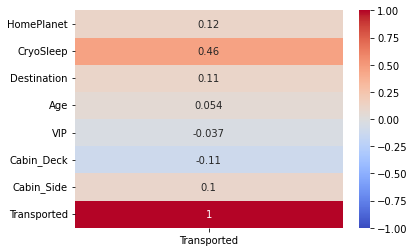

In [23]:
# Pearson Correlation
pearson_corr = train_df[wanted_columns + ["Transported"]].corr()['Transported']
sns.heatmap(pearson_corr.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

Let's first see how a basic `LogisticRegression` with default parameter works.

In [24]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

# Calculated accuracy is rounded to two decimal places
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(acc_log)

# Output to CSV
results = pd.DataFrame({'PassengerId': test_passenger_id, 'Transported': Y_pred})
results.to_csv('logistic_regression_results.csv', index=False)

71.7


/Users/georgeli/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Let's try some fine tuning methods on the Logistic Regression.

In [25]:
# param_grid = {
#     'penalty': ['l1', 'l2'],            # Regularization type
#     'C': [0.01, 0.1, 1.0, 10.0],        # Inverse of regularization strength
#     'solver': ['liblinear', 'saga']     # Optimization algorithm
# }

# logreg = LogisticRegression(max_iter=10000) 
# grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=5)
# grid_search.fit(X_train, Y_train)

# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Params", best_params)
# print("Best Score", best_score)

Then let's try a KNN, with default parameters first, then let's fine tune with the different K-values.

In [26]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(acc_knn)

# Output to CSV
results = pd.DataFrame({'PassengerId': test_passenger_id, 'Transported': Y_pred})
results.to_csv('knn_results.csv', index=False)


78.5


Let's see if we can do better with some fine tuning. Then we should use what we found from fine tuning to get a better model.

In [27]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Different values of k
    'weights': ['uniform', 'distance'],  # Weighting strategies
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Params", best_params)
print("Best Score", best_score)

Best Params {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Score 0.5300872622984123


In [28]:
knn = KNeighborsClassifier(n_neighbors = 3, metric="manhattan", weights="distance") 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(acc_knn)

results = pd.DataFrame({'PassengerId': test_passenger_id, 'Transported': Y_pred})
results.to_csv('knn_results_opt.csv', index=False)

98.46


Let's try `DecisionTreeClassifier`

In [29]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

results = pd.DataFrame({'PassengerId': test_passenger_id, 'Transported': Y_pred})
results.to_csv('decisiontree_results.csv', index=False)

98.53


In [30]:
svm_classifier = SVC(kernel='linear') 
svm_classifier.fit(X_train, Y_train)  
Y_pred = svm_classifier.predict(X_test) 
acc_svm = round(svm_classifier.score(X_train, Y_train) * 100, 2)
print(acc_svm)

results = pd.DataFrame({'PassengerId': test_passenger_id, 'Transported': Y_pred})
results.to_csv('SVM_results.csv', index=False)

71.83


# Step 4: Neural Networks
Let's try a simple neural network

In [31]:
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
# X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, Y_train,
          epochs=10, 
          batch_size=32, 
        #   validation_data=(X_val_scaled, Y_val)
        )

# loss, accuracy = model.evaluate(X_val_scaled, Y_val)
predictions = model.predict(X_test)
results = pd.DataFrame({'PassengerId': test_passenger_id, 'Transported': Y_pred})
results.to_csv('dnn_results.csv', index=False)

Epoch 1/10
272/272 [==============================] - 0s 676us/step - loss: 0.5848 - accuracy: 0.6893
Epoch 2/10
272/272 [==============================] - 0s 663us/step - loss: 0.5555 - accuracy: 0.7118
Epoch 3/10
272/272 [==============================] - 0s 673us/step - loss: 0.5514 - accuracy: 0.7145
Epoch 4/10
272/272 [==============================] - 0s 668us/step - loss: 0.5445 - accuracy: 0.7171
Epoch 5/10
272/272 [==============================] - 0s 657us/step - loss: 0.5446 - accuracy: 0.7130
Epoch 6/10
272/272 [==============================] - 0s 660us/step - loss: 0.5415 - accuracy: 0.7153
Epoch 7/10
272/272 [==============================] - 0s 666us/step - loss: 0.5431 - accuracy: 0.7157
Epoch 8/10
272/272 [==============================] - 0s 655us/step - loss: 0.5413 - accuracy: 0.7205
Epoch 9/10
272/272 [==============================] - 0s 664us/step - loss: 0.5399 - accuracy: 0.7177
Epoch 10/10
272/272 [==============================] - 0s 662us/step - loss: 0.537

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

## Step 5: Conclusion
Thanks for taking time to read my notebook! I know I learned some new tricks trying out this competition, I hope you did too! 

Leave any tips or suggestions to improve my models, my techniques, or notebook in general.